## HousePrice Prediction using ANN & Functional API

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

#### Importing Dataset from Sci-kit Learn

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=50)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=50)

#### Data Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [11]:
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
X_train.shape

(11610, 8)

In [13]:
X_test.shape

(5160, 8)

In [14]:
X_valid.shape

(3870, 8)

#### Creating Structure of Regression Functiol API ANN Model

In [17]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
# calling input_ layer as function
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

#### Compiling the model

In [19]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [24]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3663 - mae: 0.4350 - val_loss: 0.4476 - val_mae: 0.4757
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3653 - mae: 0.4340 - val_loss: 0.4482 - val_mae: 0.4763
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3643 - mae: 0.4340 - val_loss: 0.4513 - val_mae: 0.4755
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3632 - mae: 0.4327 - val_loss: 0.4499 - val_mae: 0.4755
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3624 - mae: 0.4323 - val_loss: 0.4469 - val_mae: 0.4748
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3616 - mae: 0.4317 - val_loss: 0.4467 - val_mae: 0.4744
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3606 - mae: 0.4313 - val_loss: 0.4468 - val_mae: 0.4731
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [25]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4099 - mae: 0.4470


In [26]:
model_history.history

{'loss': [0.36627867817878723,
  0.36533504724502563,
  0.36432817578315735,
  0.3632182478904724,
  0.3624318242073059,
  0.3616161346435547,
  0.3606012463569641,
  0.3597858250141144,
  0.35920804738998413,
  0.35812604427337646,
  0.357364296913147,
  0.35675734281539917,
  0.3559970259666443,
  0.35543134808540344,
  0.3545786440372467,
  0.3540550172328949,
  0.3533974885940552,
  0.35268646478652954,
  0.3519928753376007,
  0.35148435831069946,
  0.3509775996208191,
  0.3501734733581543,
  0.3497714698314667,
  0.34915074706077576,
  0.34856855869293213,
  0.34814250469207764,
  0.3475051522254944,
  0.34689751267433167,
  0.34643566608428955,
  0.3461015224456787,
  0.34547391533851624,
  0.34489911794662476,
  0.3446512520313263,
  0.34403982758522034,
  0.34347859025001526,
  0.3428935706615448,
  0.3426677882671356,
  0.34205058217048645,
  0.3415953516960144,
  0.3411848843097687],
 'mae': [0.43502628803253174,
  0.43399131298065186,
  0.43403610587120056,
  0.4327049553394

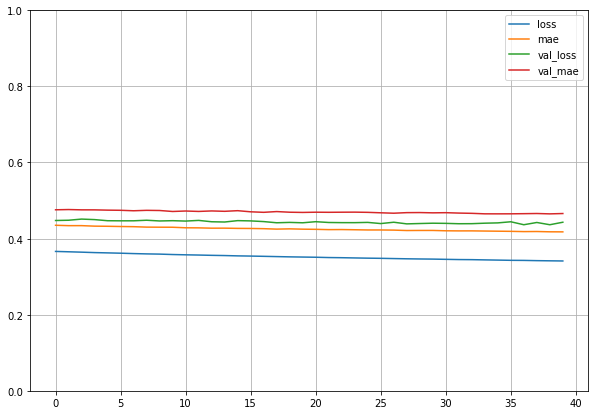

In [27]:
pd.DataFrame(model_history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Saving and Restoring Model

In [28]:
model.save('my_model.h5')

In [30]:
del model

In [31]:
keras.backend.clear_session()

In [32]:
model = keras.models.load_model('my_model.h5')

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [34]:
y_pred = model.predict(X_test)
print(y_pred)

[[1.7974662]
 [2.885044 ]
 [1.8358095]
 ...
 [1.6791342]
 [1.3873621]
 [2.1493006]]


### Using Callbacks during Model Training

- callbacks are checkpoints, they allow us to save model after each and every epoch.

In [35]:
del model

In [36]:
keras.backend.clear_session()

In [37]:
np.random.seed(55)
tf.random.set_seed(50)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [39]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [40]:
checkpoints = keras.callbacks.ModelCheckpoint('model_{epoch:02d}.h5')

In [41]:
hostory = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoints])

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.7652 - val_loss: 0.9306
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8263 - val_loss: 0.7019
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6519 - val_loss: 0.6367
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5732 - val_loss: 0.5984
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5458 - val_loss: 0.5694
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5320 - val_loss: 0.5474
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4909 - val_loss: 0.5293
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4555 - val_loss: 0.5160
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4479 - val_loss: 0.5041
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4458 - val_loss: 0.4944

In [48]:
del model

In [49]:
keras.backend.clear_session()

In [50]:
model = keras.models.load_model('model_13.h5')

In [51]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4527
